## Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/drive/MyDrive/ML_data/task2/train.csv',index_col='id')

df_train = pd.read_csv('/content/drive/MyDrive/ML_data/task2/train.csv',index_col='id')
df_test = pd.read_csv('/content/drive/MyDrive/ML_data/task2/test.csv',index_col='id')

## Check Data Info

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101658 entries, PLY00001 to PLY101658
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   player_id                         101658 non-null  object 
 1   play_frequency                    93785 non-null   float64
 2   avg_session_duration              93771 non-null   float64
 3   total_playtime_hours              93887 non-null   float64
 4   login_streak                      93938 non-null   float64
 5   days_since_last_login             93878 non-null   float64
 6   total_spending_thb                93902 non-null   float64
 7   avg_monthly_spending              93923 non-null   float64
 8   spending_frequency                93898 non-null   float64
 9   friend_count                      93720 non-null   float64
 10  team_play_percentage              93963 non-null   float64
 11  chat_activity_score               93893 non-nul

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25889 entries, ANS00001 to ANS25889
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   player_id                         25889 non-null  object 
 1   play_frequency                    23886 non-null  float64
 2   avg_session_duration              23931 non-null  float64
 3   total_playtime_hours              23924 non-null  float64
 4   login_streak                      23875 non-null  float64
 5   days_since_last_login             23993 non-null  float64
 6   total_spending_thb                23972 non-null  float64
 7   avg_monthly_spending              23958 non-null  float64
 8   spending_frequency                23939 non-null  float64
 9   friend_count                      23886 non-null  float64
 10  team_play_percentage              23867 non-null  float64
 11  chat_activity_score               23863 non-null  float64
 12 

In [ ]:
# df.info()

In [17]:
df_train['segment'].value_counts()

,count
segment,
0,40064
1,25397
2,20549
3,15648


## Calculate Numerical Feature Correlation Matrix

**Pearson correlation** = matrix ที่แสดง correlation coefficient ของตัวแปรเชิงปริมาณทุกคู่ที่เป็นไปได้ในชุดข้อมูล

**All train data**

In [9]:
# Selecting numerical features in X_train
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

# แปลงเป็น corr matrix
numerical_correlation_matrix = df_train[num_cols].corr(method='pearson')
print("Numerical Feature Correlation Matrix computed.")
print(numerical_correlation_matrix.head())

Numerical Feature Correlation Matrix computed.
                       play_frequency  avg_session_duration  \
play_frequency               1.000000              0.055288   
avg_session_duration         0.055288              1.000000   
total_playtime_hours         0.064699              0.072930   
login_streak                 0.050517              0.055686   
days_since_last_login       -0.082028             -0.086376   

                       total_playtime_hours  login_streak  \
play_frequency                     0.064699      0.050517   
avg_session_duration               0.072930      0.055686   
total_playtime_hours               1.000000      0.067286   
login_streak                       0.067286      1.000000   
days_since_last_login             -0.093088     -0.069627   

                       days_since_last_login  total_spending_thb  \
play_frequency                     -0.082028            0.026279   
avg_session_duration               -0.086376            0.029410   
tot

**Train data without segment column**

In [10]:
df_noSegment = df_train.drop(columns=['segment', 'player_id'])

# Selecting numerical features in X_train
num_cols = df_noSegment.select_dtypes(include=[np.number]).columns.tolist()

# แปลงเป็น corr matrix
numerical_correlation_matrix_noSegment = df_noSegment[num_cols].corr(method='pearson')
print("Numerical Feature Correlation Matrix computed.")
print(numerical_correlation_matrix.head())

Numerical Feature Correlation Matrix computed.
                       play_frequency  avg_session_duration  \
play_frequency               1.000000              0.055288   
avg_session_duration         0.055288              1.000000   
total_playtime_hours         0.064699              0.072930   
login_streak                 0.050517              0.055686   
days_since_last_login       -0.082028             -0.086376   

                       total_playtime_hours  login_streak  \
play_frequency                     0.064699      0.050517   
avg_session_duration               0.072930      0.055686   
total_playtime_hours               1.000000      0.067286   
login_streak                       0.067286      1.000000   
days_since_last_login             -0.093088     -0.069627   

                       days_since_last_login  total_spending_thb  \
play_frequency                     -0.082028            0.026279   
avg_session_duration               -0.086376            0.029410   
tot

### Visualize Numerical Features Correlation

**Train Data (with segment column)**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

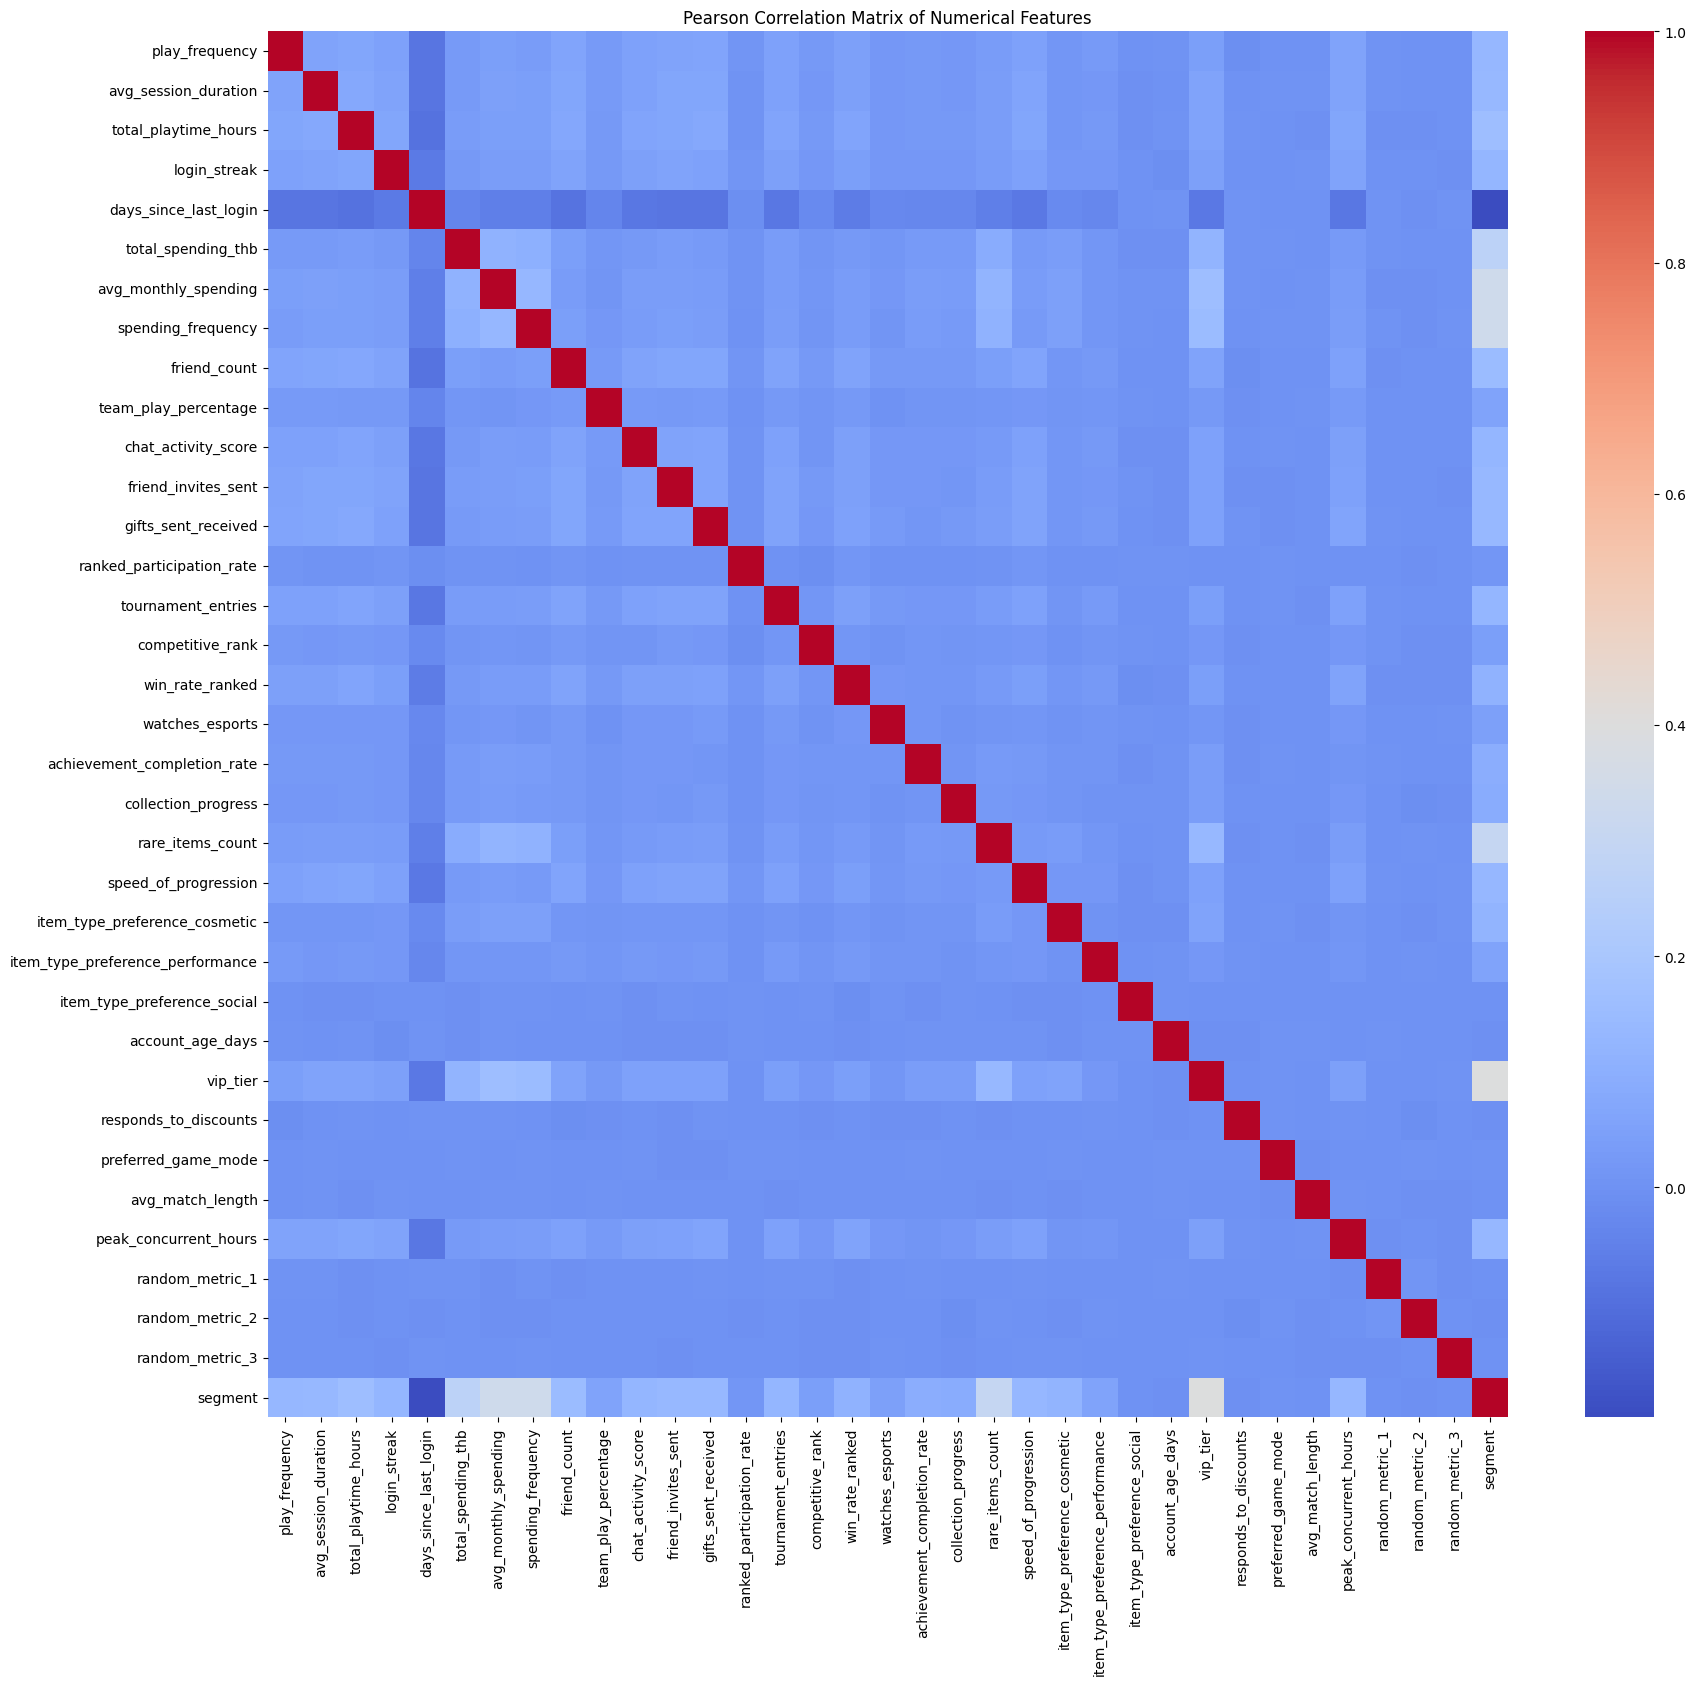

Numerical Feature Correlation Matrix visualized.


In [26]:
plt.figure(figsize=(20, 18))
sns.heatmap(numerical_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()
print("Numerical Feature Correlation Matrix visualized.")

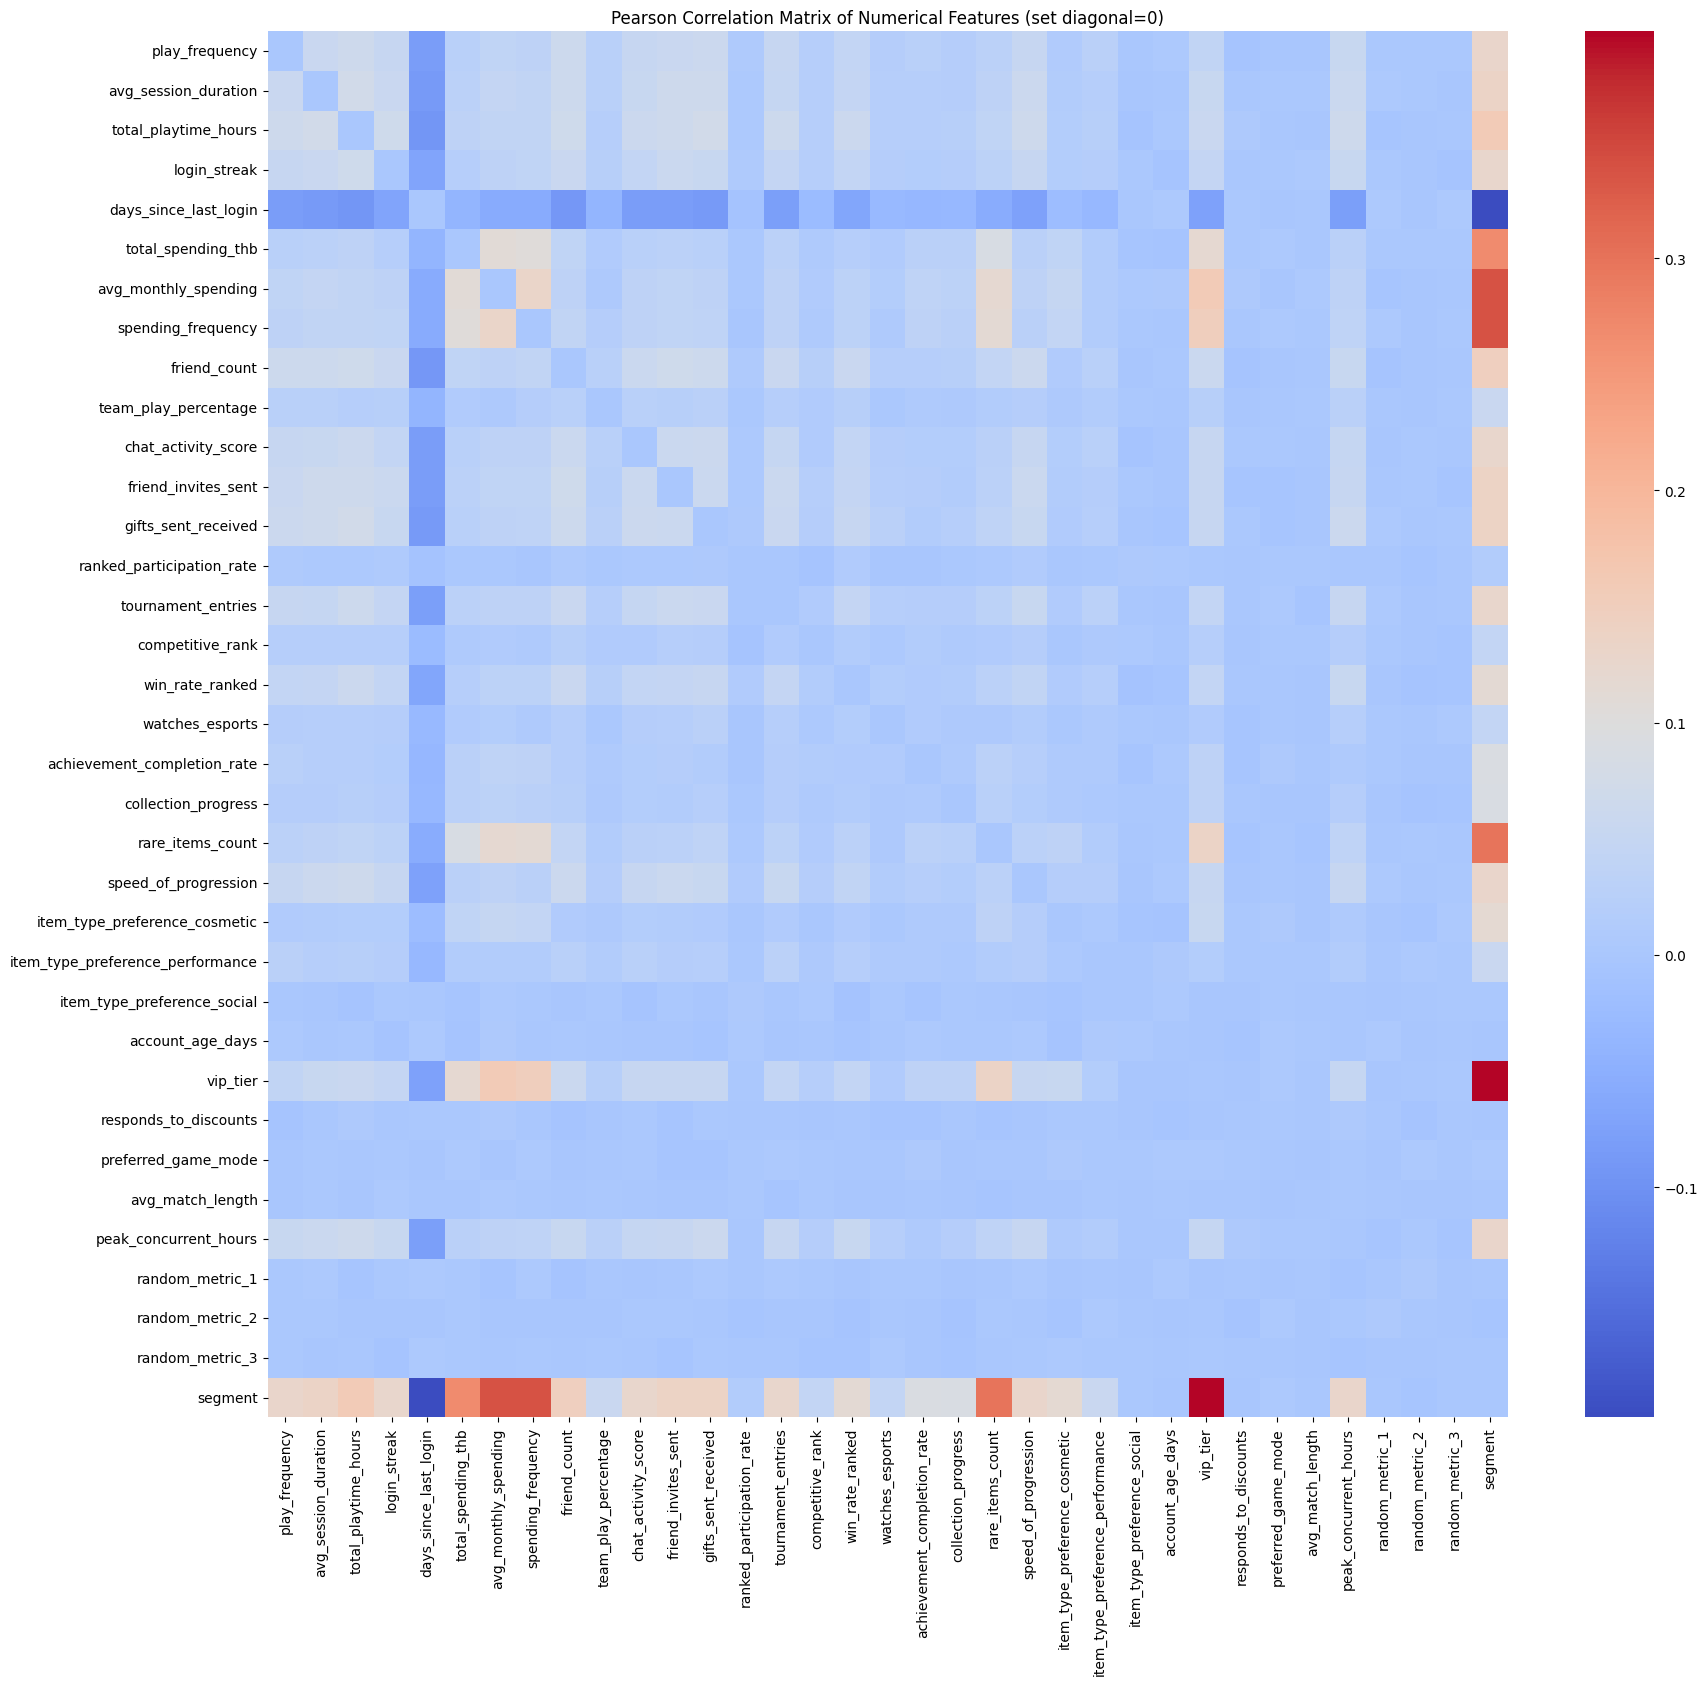

Numerical Feature Correlation Matrix visualized.


In [28]:
# Set diagonal to 0 to exclude self-correlation
np.fill_diagonal(numerical_correlation_matrix.values, 0)

plt.figure(figsize=(20, 18))
sns.heatmap(numerical_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features (set diagonal=0)')
plt.show()
print("Numerical Feature Correlation Matrix visualized.")

**Train Data (no segment column)**

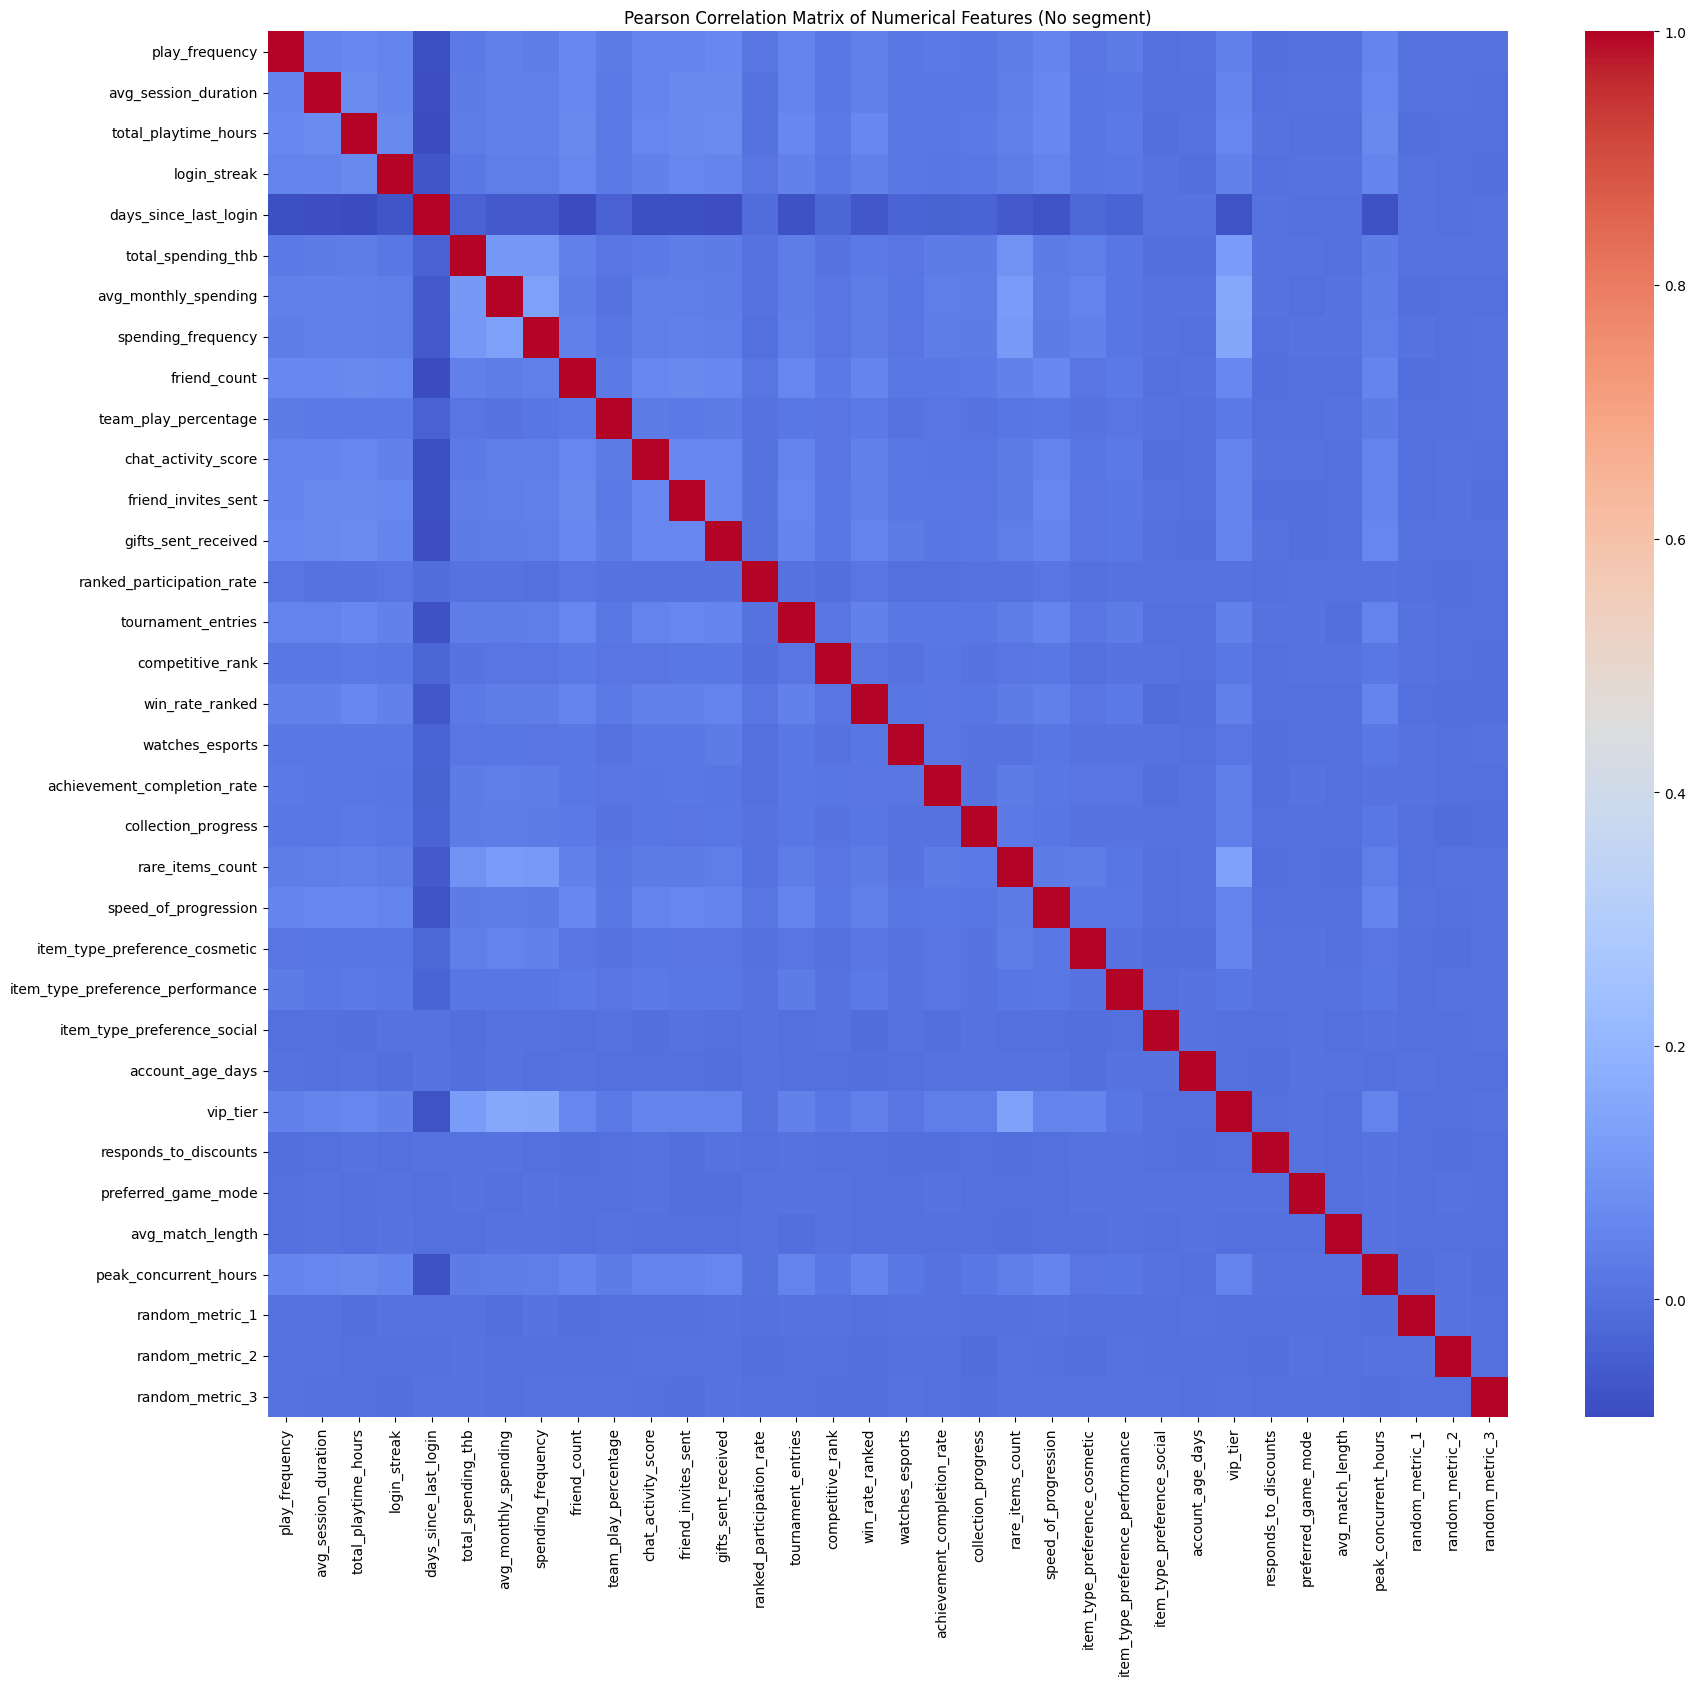

Numerical Feature Correlation Matrix visualized.


In [29]:
plt.figure(figsize=(20, 18))
sns.heatmap(numerical_correlation_matrix_noSegment, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features (No segment)')
plt.show()
print("Numerical Feature Correlation Matrix visualized.")

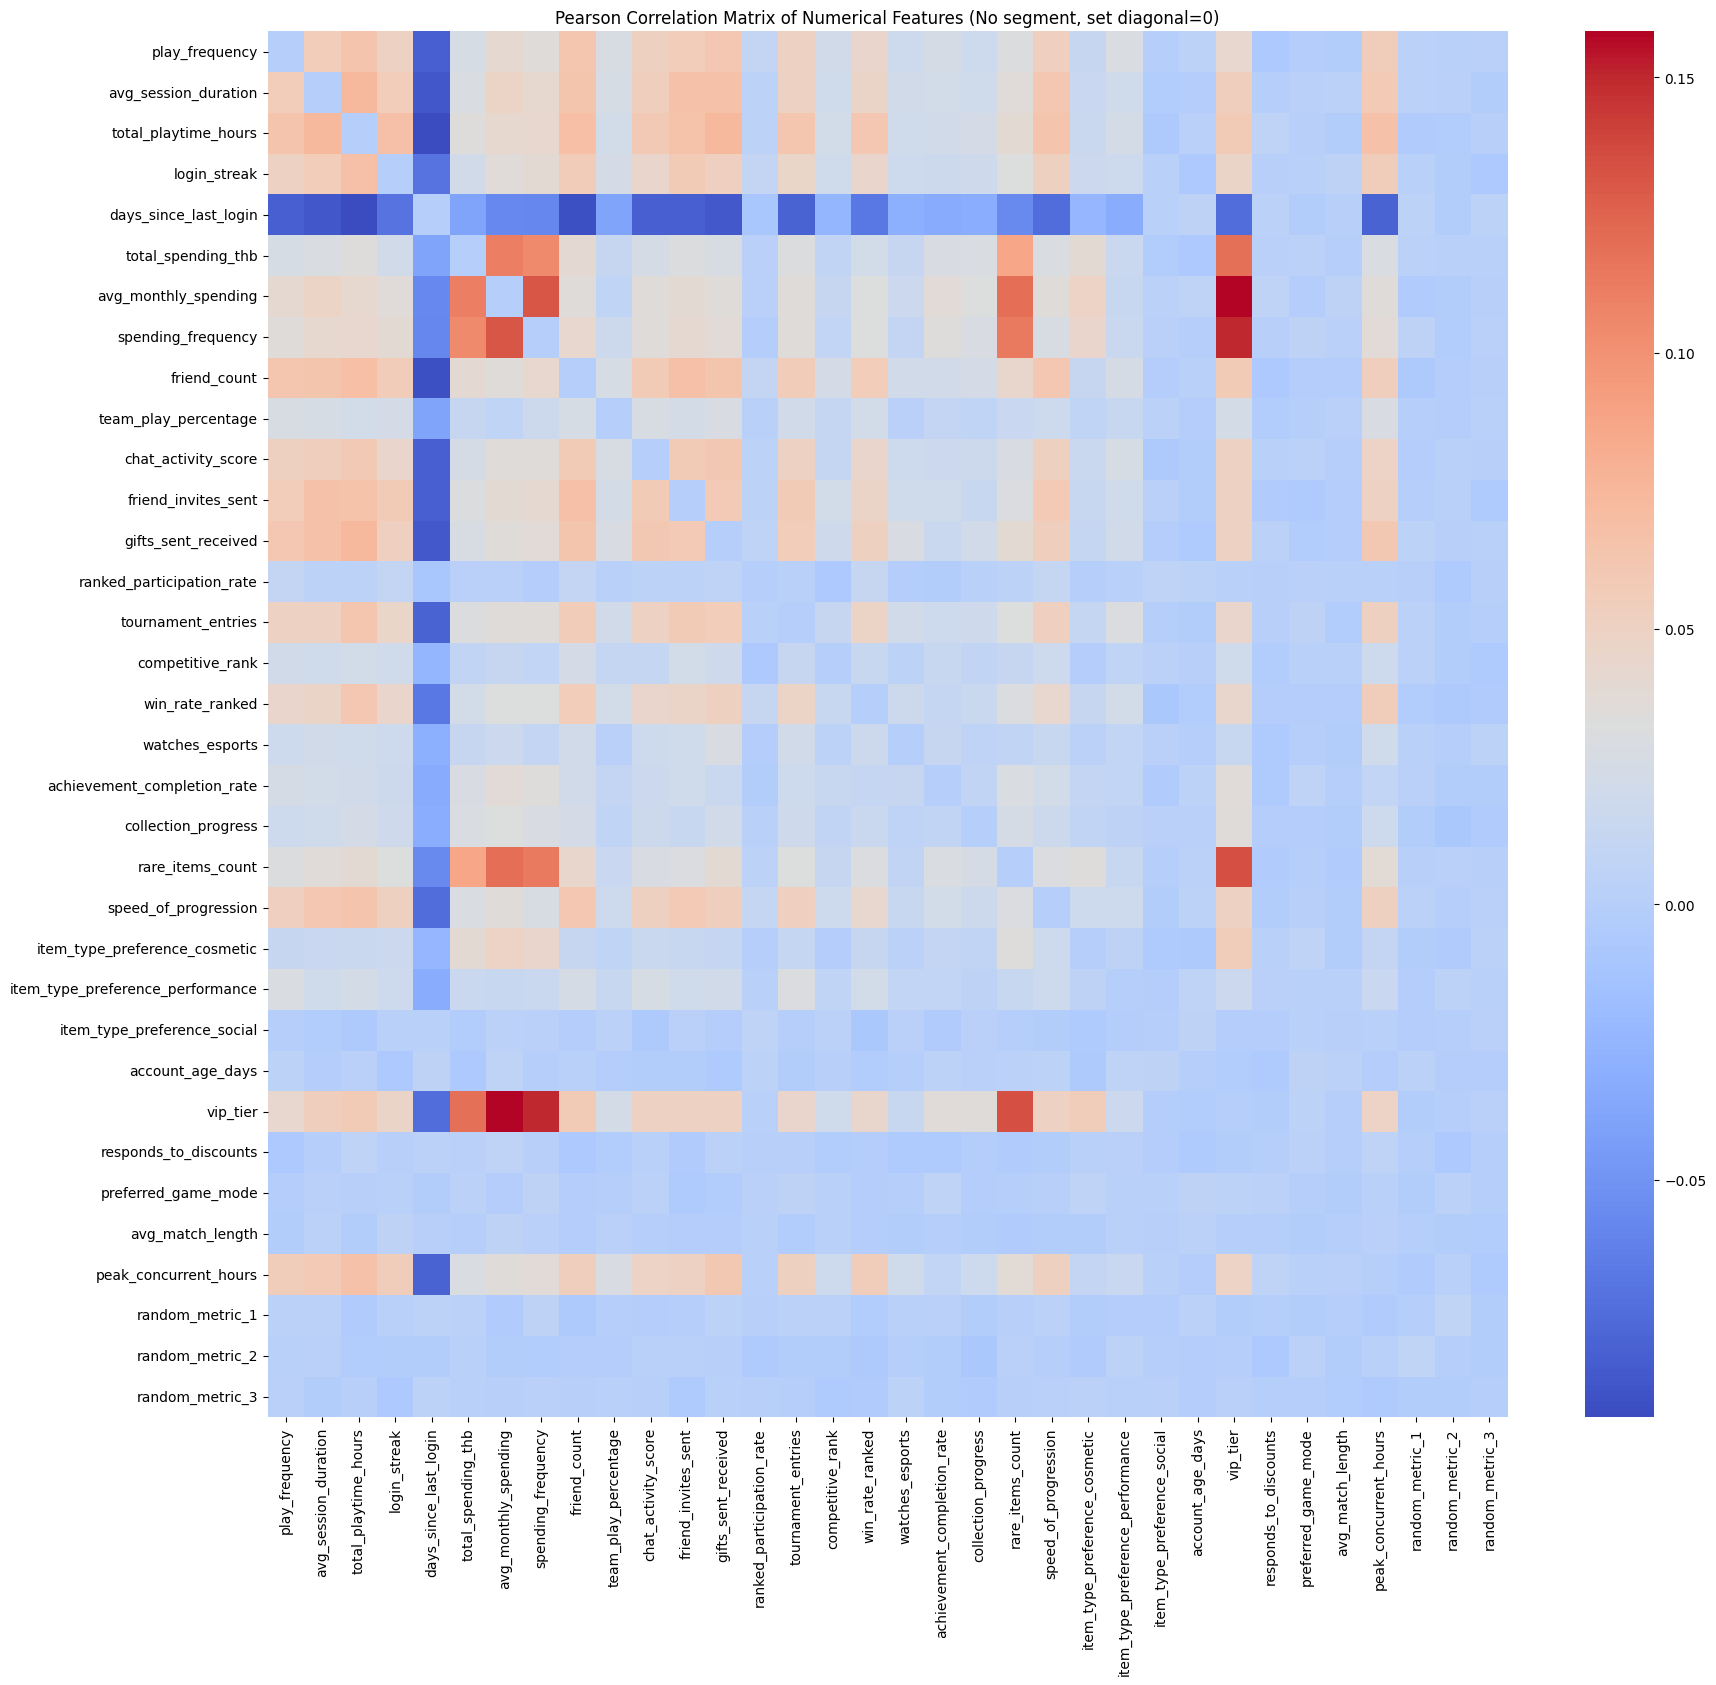

Numerical Feature Correlation Matrix visualized.


In [30]:
# Set diagonal to 0 to exclude self-correlation
np.fill_diagonal(numerical_correlation_matrix_noSegment.values, 0)

plt.figure(figsize=(20, 18))
sns.heatmap(numerical_correlation_matrix_noSegment, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features (No segment, set diagonal=0)')
plt.show()
print("Numerical Feature Correlation Matrix visualized.")

### Find the most correlation pair

**Train data (with segment)**

In [31]:
# Set diagonal to 0 to exclude self-correlation
np.fill_diagonal(numerical_correlation_matrix.values, 0)

# Get the upper triangle of the correlation matrix to avoid duplicate pairs and self-correlation
# คือค่าใน correlation matrix ค่าบนกับล่างของ diagonal มันซ้ำกัน แล้วทีนี้หากเราจะ list ค่าที่มากสุดออกมา แล้วไม่ดึง upper triangle ออกมา = ค่าจะซ้ำกัน
# np.ones(numerical_correlation_matrix.shape): สร้าง matrix ที่มีขนาดเท่ากันและมีค่าเป็น 1 ทั้งหมด
# np.triu(..., k=1): สร้าง upper triangle matrix จาก matrix หนึ่งนั้น
#    k=1 -> เริ่มจากแนวทแยงมุมที่อยู่เหนือแนวทแยงมุมหลักขึ้นไป 1 ขั้น (ไม่เอา diagonal line)
# .astype(bool): แปลงค่า 1 ให้เป็น True และค่า 0 ให้เป็น False [ส่วนนี้คือ Mask]
# .where(...): นำ Mask นี้ไปใช้กับ corr matrix เดิม โดย True = เก็บ; False = ตัด

upper_tri = numerical_correlation_matrix.where(np.triu(np.ones(numerical_correlation_matrix.shape), k=1).astype(bool))

# Stack the DataFrame to get a Series of correlations
# แปลงข้อมูลจาก matrix/dataframe -> series [2D -> 1D]
stacked_corr = upper_tri.stack()

# Sort the correlations by absolute value in descending order
sorted_corr = stacked_corr.reindex(stacked_corr.abs().sort_values(ascending=False).index)

print("Top 20 Most Correlated Numerical Feature Pairs (excluding self-correlation):")
print(sorted_corr.head(20).to_string())

Top 20 Most Correlated Numerical Feature Pairs (excluding self-correlation):
vip_tier               segment               0.397576
spending_frequency     segment               0.338247
avg_monthly_spending   segment               0.337823
rare_items_count       segment               0.298105
total_spending_thb     segment               0.268942
days_since_last_login  segment              -0.199048
total_playtime_hours   segment               0.158612
avg_monthly_spending   vip_tier              0.158343
spending_frequency     vip_tier              0.150374
friend_count           segment               0.148156
gifts_sent_received    segment               0.137781
friend_invites_sent    segment               0.137004
avg_session_duration   segment               0.134920
rare_items_count       vip_tier              0.134382
avg_monthly_spending   spending_frequency    0.131715
speed_of_progression   segment               0.129533
play_frequency         segment               0.129370
peak_

**Train data (no segment)**

In [35]:
np.fill_diagonal(numerical_correlation_matrix_noSegment.values, 0)

upper_tri_noSegment = numerical_correlation_matrix_noSegment.where(np.triu(np.ones(numerical_correlation_matrix_noSegment.shape), k=1).astype(bool))

stacked_corr_noSegment = upper_tri_noSegment.stack()

sorted_corr_noSegment = stacked_corr_noSegment.reindex(stacked_corr_noSegment.abs().sort_values(ascending=False).index)

print("Top 20 Most Correlated Numerical Feature Pairs (excluding self-correlation):")
print(sorted_corr_noSegment.head(20).to_string())

Top 20 Most Correlated Numerical Feature Pairs (excluding self-correlation):
avg_monthly_spending   vip_tier                 0.158343
spending_frequency     vip_tier                 0.150374
rare_items_count       vip_tier                 0.134382
avg_monthly_spending   spending_frequency       0.131715
                       rare_items_count         0.119113
total_spending_thb     vip_tier                 0.118699
spending_frequency     rare_items_count         0.113590
total_spending_thb     avg_monthly_spending     0.110833
                       spending_frequency       0.104491
total_playtime_hours   days_since_last_login   -0.093088
days_since_last_login  friend_count            -0.090557
total_spending_thb     rare_items_count         0.086673
avg_session_duration   days_since_last_login   -0.086376
days_since_last_login  gifts_sent_received     -0.086103
                       friend_invites_sent     -0.082173
play_frequency         days_since_last_login   -0.082028
days_since_

**Cramer's V Association Matrix** = Matrix ที่แสดงความสัมพันธ์(Association) ของตัวแปรเชิงคุณภาพ(Categorical)

**Cross-tabulation (Crosstab)**

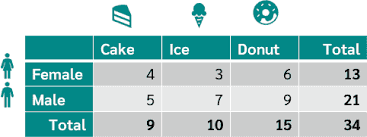

In [36]:
from IPython.display import Image, display

crosstab_image_path = '/content/drive/MyDrive/ML_data/crosstab.png'
display(Image(filename=crosstab_image_path))

**Bergsma's Correction** = การปรับแก้ bias

## Calculate Categorical Feature Correlation Matrix

**Population and Sample**

*Population:* ชุดข้อมูลทั้งหมดที่เป็นไปได้ หรือขอบเขตของปรากฏการณ์ทั้งหมดที่ต้องการให้ model ทำงานได้

*Sample:* ข้อมูลที่มีอยู่ในมือจริง ๆ และใช้ในการสร้าง พัฒนา และประเมินแบบจำลอง

*ตัวอย่าง* <br>ถ้าเป็น model ทำนายการซื้อสินค้าออนไลน์ <br> population = ข้อมูลธุรกรรมทั้งหมดของลูกค้าตลอดอายุการใช้งานของบริษัท (รวมถึงลูกค้าในอนาคตที่ยังไม่มีข้อมูล) <br> sample = ข้อมูลธุรกรรของลูกค้าที่มี ณ ตอนนี้

แปลว่า data ทั้งหลายที่เราเอามา train เนี่ยมันคือ sample แล้วมันอาจจะมี bias หรือก็คือมีแนวโน้มสูงเกินจริง (Upward bias)

***

**สูตร chi2**
<br> $\chi^2 = ∑\frac{(O-E)^2}{E}$
<br> $O$ คือ Observed (ความถี่ที่สังเกตได้จริง)
<br> $E$ คือ Expected (ความถี่ที่คาดหวังภายใต้สมมติฐานความเป็นอิสระ)
<br> ถ้า $O$ ใกล้เคียงกับ $E$ ค่า $\chi^2$ ก็จะต่ำ

**Sampling Error (ปัญหาจากการสุ่มตัวอย่าง)**
<br> เมื่อคุณสุ่มเก็บข้อมูลจากประชากรมาเป็นตัวอย่างเล็ก ๆ มันแทบจะเป็นไปไม่ได้เลยที่ความถี่ที่สังเกตได้จริง ($O$) จะเท่ากับความถี่ที่คาดหวัง ($E$) ในทุก ๆ ช่อง
<br> แม้ว่าในความเป็นจริง population มันจะไม่มีความสัมพันธ์เลยก็ตาม การสุ่มตัวอย่างจะทำให้เกิดความผันผวน ซึ่งทำให้ค่า $O$ และ $E$ แตกต่างกันเล็กน้อยในบางช่อง
<br> และใน $\chi^2$ เราใช้การยกกำลังสอง $(O-E)^2$ แปลว่าถึง $O$ จะมากกว่าหรือน้อยกว่า $E$ ค่า $\chi^2$ ก็เพิ่มอยู่ดี ซึ่งมันทำให้ค่า $\chi^2$ มีค่าสูงกว่า 0 เสมอ แม้ประชากรจะไม่มีความสัมพันธ์เลยก็ตาม
<br> $\chi^2$ สูงส่งผลให้ $\phi^2 (\phi^2 = \frac{\chi^2}{N})$ มีค่าสูงเกินจริงตามไปด้วย

**การปรับแก้ bias**
<br> ใช้วิธีลบพจน์ $\frac{(k-1)(r-1)}{n-1}$ ออกไป ก็คือการประมาณค่าและลบความผันผวนส่วนเกิน ที่เกิดจากการสุ่มตัวอย่างออกไป เพื่อให้ค่า $\phi_{corr}^2$ สะท้อนความสัมพันธ์ที่แท้จริงในประชากรได้แม่นยำยิ่งขึ้น

**Cramer's V Function**

In [14]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) # สร้าง crosstab ของ feature x, y
    chi2 = chi2_contingency(confusion_matrix)[0] # chi2 สูง = x, y dependent, chi2 ต่ำ = x, y independent

    # sum ครั้งแรก: บวกค่าตามแกนตั้ง (รวมค่าแต่ละคอลัมน์เข้าด้วยกัน) ได้ pandas series
    # sum ครั้งที่สอง: บวกค่าใน series เข้าด้วยกัน ได้ ผลรวมของทุกความถี่ใน corr matrix
    n = confusion_matrix.sum().sum()

    # Handle cases where n is zero or one to prevent division by zero
    if n == 0: return 0.0

    phi2 = chi2 / n # เพื่อ normalize ค่า chi2 ให้อยู่ระหว่าง 0-1

    r, k = confusion_matrix.shape # r = จน.แถว(X categories), k = จน.คอลัมน์(Y categories)

    # Apply corrections for bias
    # Cramer's V ที่คำนวณโดยตรงจาก chi2 อาจจะมี bias
    # โดยเฉพาะเมื่อตัวอย่างขนาดเล็ก(small n) หรือมีจำนวนกลุ่ม(categories) มาก
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) # Bergsma's Correction
    rcorr = r - ((r-1)**2)/(n-1) # ปรับแก้จำนวนแถว
    kcorr = k - ((k-1)**2)/(n-1) # ปรับแก้จำนวนคอลัมน์

    # Handle cases where denominator(ตัวส่วน) might be zero or negative after corrections
    if min((kcorr-1), (rcorr-1)) <= 0: return 0.0 # Return 0 for no meaningful association

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) # [0, 1] โดย 0 = ไม่มีความสัมพันธ์

### Create Cramer's V Association Matrix
<br> ใช้เพื่อวัดความสัมพันธ์ระหว่าง Categorical feature pairs ทุกคู่

**All train data**

In [18]:
# Select only categorical columns
df_noId = df_train.drop(columns=['player_id'])
cat_cols = df_noId.select_dtypes(exclude=[np.number]).columns.tolist()

# Create dataframe เปล่า ชื่อ categorical_association_matrix ซึ่งมีลักษณะเป็นตารางจัตุรัส
# ใช้เก็บค่า Cramer's V ของคสพ.ระหว่างตัวแปรทุกคู่
categorical_association_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# การวนซ้ำเพื่อคำนวณ Cramer's V (Matrix Calculation)
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2: # ถ้าเป็น self correlation = 1.0
            categorical_association_matrix.loc[col1, col2] = 0.0
        else:
            # Ensure there are no NaNs in the columns before calculating Cramer's V
            # สร้าง df ชั่วคราวที่มีเฉพาะ 2 col ที่กำลังพิจารณา และตัด rows ที่เป็น NaN ออก
            # เพื่อให้ฟังก์ชัน cramers_v คำนวณได้ถูกต้อง (มันต้องใช้ข้อมูลที่ไม่มีค่าว่าง)
            temp_df = df_noId[[col1, col2]].dropna()

            # Check if there's enough data and variability to calculate Cramer's V
            # เช็คก่อนว่า 1. df ต้องไม่ว่างเปล่า
            #          2. แต่ละคอลัมน์มี categories มากกว่า 1 กลุ่ม (ถ้ามีกลุ่มเดียวก็คำนวณคสพ.ไม่ได้สิคับ)
            # ถ้า conditions ตรงทุกอันค่อยไปคำนวณค่า Cramer's V
            if not temp_df.empty and len(temp_df[col1].unique()) > 1 and len(temp_df[col2].unique()) > 1:
                categorical_association_matrix.loc[col1, col2] = cramers_v(temp_df[col1], temp_df[col2])
            else:
                categorical_association_matrix.loc[col1, col2] = 0.0 # Assign 0 for cases with insufficient variance or data

categorical_association_matrix = categorical_association_matrix.astype(float)
print("Categorical Feature Cramer's V Association Matrix computed.")
print(categorical_association_matrix.head())

Categorical Feature Cramer's V Association Matrix computed.
                  region  platform  device_type  payment_method  language  \
region          0.000000  0.006198     0.001988             0.0  0.002921   
platform        0.006198  0.000000     0.000000             0.0  0.000000   
device_type     0.001988  0.000000     0.000000             0.0  0.000000   
payment_method  0.000000  0.000000     0.000000             0.0  0.000000   
language        0.002921  0.000000     0.000000             0.0  0.000000   

                account_status  player_type_tag  engagement_level  \
region                 0.00491         0.000000          0.004857   
platform               0.00000         0.000000          0.000000   
device_type            0.00000         0.000000          0.000000   
payment_method         0.00000         0.005493          0.000000   
language               0.00000         0.004529          0.005721   

                loyalty_tier  skill_tier  
region             

### Visualize Categorical Association Matrix

**All train data**

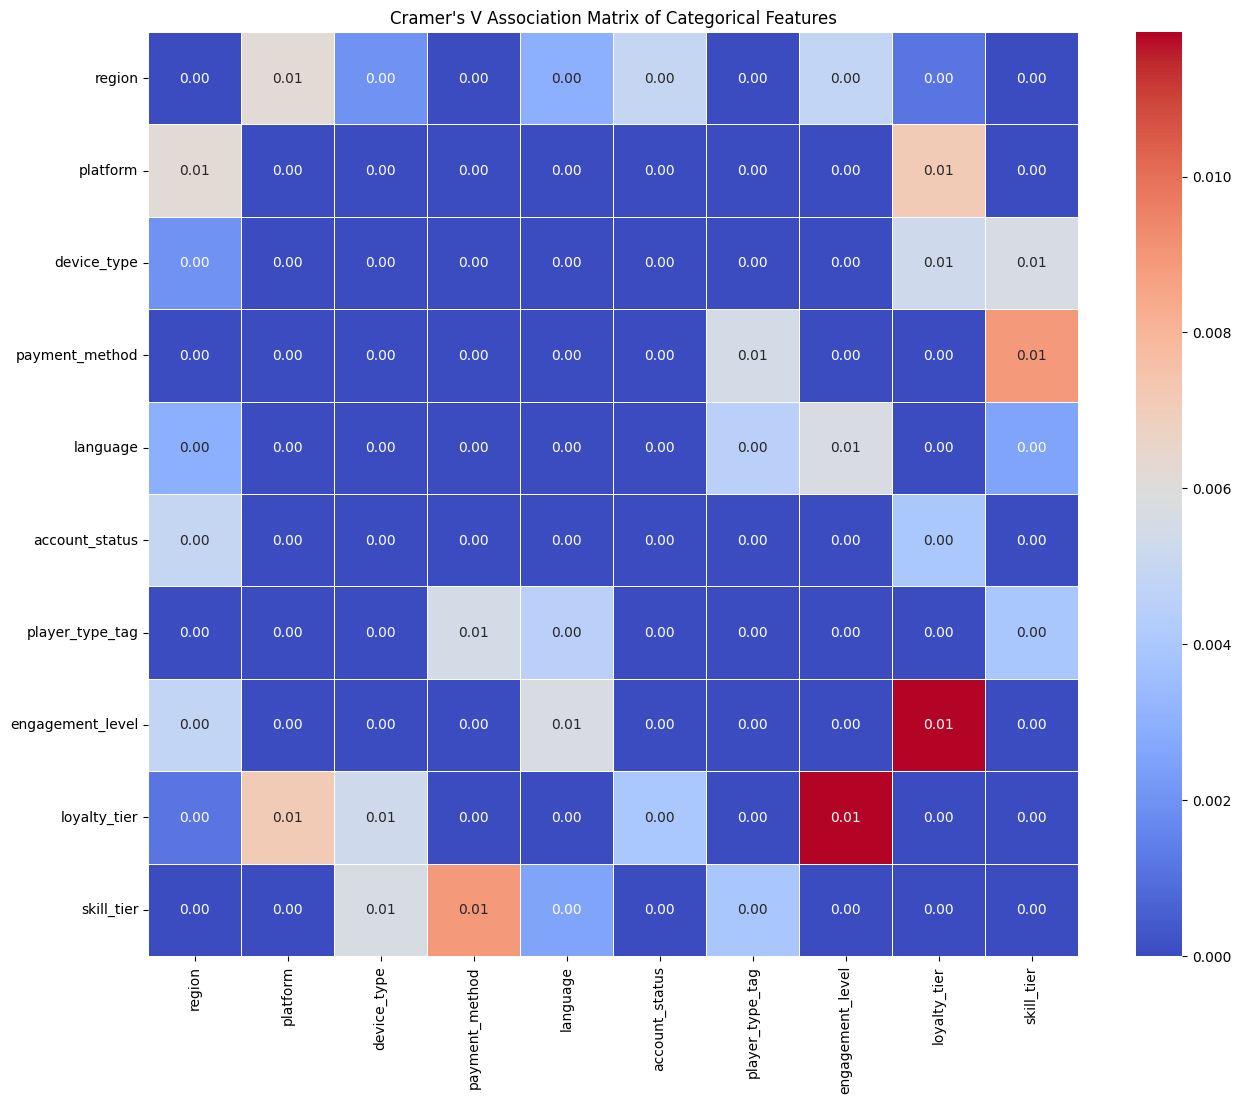

Categorical Feature Cramer's V Association Matrix visualized.


In [19]:
plt.figure(figsize=(15, 12))
sns.heatmap(categorical_association_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramer\'s V Association Matrix of Categorical Features')
plt.show()
print("Categorical Feature Cramer's V Association Matrix visualized.")

## Apply PCA for Dimensionality Reduction

**PCA** (Principal Component Analysis): เทคนิคทางสถิติและคณิตศาสตร์ที่ใช้ในการลดมิติ (Dimensionality Reduction) ของชุดข้อมูล โดยการแปลงตัวแปรเดิมที่มีความสัมพันธ์กันให้อยู่ในรูปของชุดตัวแปรใหม่ เรียกว่า Principal components ซึ่งตัวแปรใหม่เหล่านี้จะไม่มีคสพ. กันเลย


**Import**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

**Spliting data**

In [23]:
y = df['segment']
X = df.drop(columns=['segment', 'player_id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting numerical features in X_train
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Selecting Categorical features in X_train
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

**Pipeline**

*One-Hot Encoding:* สร้างคอลัมน์ใหม่ที่เป็น 0 หรือ 1 สำหรับแต่ละกลุ่ม

In [24]:
categorical_proc = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # แทนที่ missing val ด้วยค่าที่ปรากฏบ่อยสุดใน col นั้น
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # แปลง cat_var -> num_var โดยใช้เทคนิค One-Hot Encoding
])                                                      # ถ้าเจอกลุ่มที่ไม่รู้จัก (ไม่เคย train) -> ignore

numeric_proc_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # แทนที่ missing val ด้วย median
    ('scaler', StandardScaler()), # Standardization ให้ data มี mean=0 และ std=1 (PCA sensitive กับมาตราส่วนของ data)
    ('pca', PCA(n_components=0.95)) # PCA เก็บเฉพาะ principal components ที่สามารถอธิบาย cumulative variance ของ num_data ได้ 95%
])

# เอา pipeline มารวมเข้าด้วยกัน
# ColumnTransformer เป็นเครื่องมือที่ใช้รวม Pipeline ย่อย ๆ เข้าด้วยกัน
preprocessor_pca = ColumnTransformer([
    ('num', numeric_proc_pca, num_cols), # นำ numeric_proc_pca ไปใช้กับคอลัมน์ที่อยู่ในลิสต์ num_cols
    ('cat', categorical_proc, cat_cols)
])

print("PCA integrated preprocessing pipeline created.")

PCA integrated preprocessing pipeline created.


## Train Model with PCA-transformed Data



**Import**

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

**Train Model**

In [ ]:
# Define param_dist for XGBoost
param_dist_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Pipeline
model_xgb = Pipeline([
    ('preprocessor', preprocessor_pca),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
])

# Initialize RandomizedSearchCV
srch_xgb = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_weighted',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1 # ให้ CPU run ทุก core ที่ว่าง
)

# Fit the RandomizedSearchCV object to the X_train and y_train datasets
srch_xgb.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found with XGBoost: ", srch_xgb.best_params_)

# Store the best performing model
best_model_xgb = srch_xgb.best_estimator_
print("XGBoost-enhanced model training complete and best model stored.")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:43:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found with XGBoost:  {'classifier__subsample': 1.0, 'classifier__n_estimators': 300, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.6}
XGBoost-enhanced model training complete and best model stored.


### Evaluate

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, top_k_accuracy_score

In [26]:
def evaluate(model, X, y, label="Test"):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, digits=4)
    print(f"=== {label} Report ===")
    print(report)
    print("Confusion matrix:\n", confusion_matrix(y, y_pred))

    if hasattr(model.named_steps["classifier"], "predict_proba"):
        y_proba = model.predict_proba(X)
        print("LogLoss:", log_loss(y, y_proba))
        print("Top-2 Acc:", top_k_accuracy_score(y, y_proba, k=2))
    else:
        print("(No predict_proba available.)")

In [ ]:
evaluate(best_model_xgb, X_test, y_test, label="Test - XGBoost") # Updated model and label

=== Test - XGBoost Report ===
              precision    recall  f1-score   support

           0     0.7846    0.8501    0.8161      7993
           1     0.7387    0.7334    0.7360      5097
           2     0.7272    0.6710    0.6980      4073
           3     0.7701    0.6936    0.7299      3169

    accuracy                         0.7606     20332
   macro avg     0.7552    0.7370    0.7450     20332
weighted avg     0.7594    0.7606    0.7589     20332

Confusion matrix:
 [[6795  752  397   49]
 [ 957 3738  147  255]
 [ 779  209 2733  352]
 [ 129  361  481 2198]]
LogLoss: 0.6222991603300465
Top-2 Acc: 0.9390615778083808


## Save Model

In [ ]:
import joblib
joblib.dump(best_model_xgb, '/content/drive/MyDrive/ML_data/task2/task2_xgboost_model_v1.joblib')
print("Model saved to task2_xgboost_model_v1.joblib")

Model saved to task2_xgboost_model_v1.joblib


# Predict Test Data

**Import**

In [ ]:
import pandas as pd

In [27]:
test_data = pd.read_csv('/content/drive/MyDrive/ML_data/task2/test.csv', index_col='id')

## Prepare Test Data for Prediction


In [28]:
test_data = test_data.drop(columns=['player_id'])

## Prediction

In [ ]:
test_predictions = best_model_xgb.predict(test_data)
print("Predictions made on test data using XGBoost model.")

Predictions made on test data using XGBoost model.


In [ ]:
test_predictions

array([2, 0, 0, ..., 1, 0, 3])

## Save Predict Values

In [ ]:
result_df = pd.read_csv('/content/drive/MyDrive/ML_data/task2/resultsV20.csv')
result_df['task2'] = test_predictions # Changed column name to indicate XGBoost predictions
result_df.to_csv('/content/drive/MyDrive/ML_data/task2/resultsV20.csv', index=False)
print("Updated 'task2_xgb' column in resultsV9.csv with XGBoost predictions for test data and saved the file.")

Updated 'task2_xgb' column in resultsV9.csv with XGBoost predictions for test data and saved the file.
